# <center> Velocity Profile </center>

# <center> Density Profile </center>

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
from nudca.kilonovae import Geometry, DensityProfile, VelocityProfile
from nudca.constants import M_SUN_CGS

density = DensityProfile(
    density_scheme='Metzger2017',
    # density_scheme='Kasen2017',
    mass_ejecta=2e-3,
    vel_min=0.1,
    vel_max=0.3)
times = np.geomspace(1e-5, 1e9, 5000)

rho = density.density_distribution(12, 0.1)
print(rho)
# print(type(rho))

0.006186937694836247


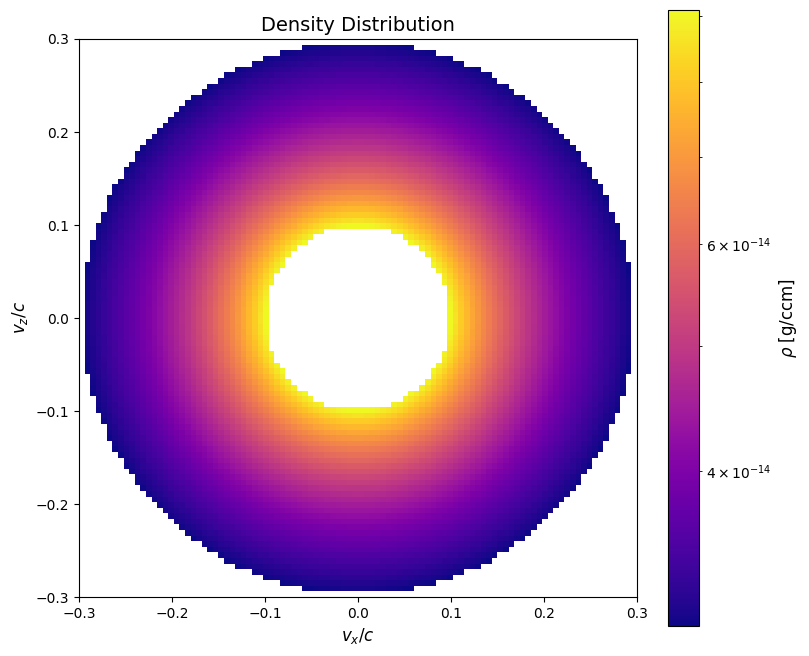

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

from nudca.kilonovae import Geometry, DensityProfile, VelocityProfile

geometry = Geometry(
    velocity_scheme="Default",
    # density_scheme="Metzger2017",
    density_scheme="Kasen2017",
    mass_ejecta=0.01,
    vel_ejecta=0.1
)

vel_profile = VelocityProfile(velocity_scheme='Other', vel_min=-0.3, vel_max=0.3)

vel_x, vel_y = np.meshgrid(
    vel_profile.velocity_distribution(100),
    vel_profile.velocity_distribution(100)
)

# vel_x, vel_y = np.meshgrid(
#     np.linspace(0, 0.3, 500),
#     np.linspace(0, 0.3, 500)
# )

times = 86400.0
vel_shells = np.sqrt(vel_x**2 + vel_y**2)
vel_min, vel_max = 0.1, 0.3
rho_shells = geometry.density_shells(times, vel_shells)
rho_shells[(vel_shells < vel_min) | (vel_shells > vel_max)] = np.nan

norm = LogNorm(vmin=np.nanmin(rho_shells), vmax=np.nanmax(rho_shells))

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(
    rho_shells, 
    origin='lower', 
    aspect='equal',
    cmap=cm.plasma, 
    extent=[vel_x.min(), vel_x.max(), vel_y.min(), vel_y.max()], 
    norm=norm
)

ax.set_xlim(-0.3, 0.3)
ax.set_ylim(-0.3, 0.3)
# ax.set_xlim(0, 0.3)
# ax.set_ylim(0, 0.3)
ax.set_xlabel(r'$v_{x}/c$', fontsize=12)
ax.set_ylabel(r'$v_{z}/c$', fontsize=12)

cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label(r'$\rho$ [g/ccm]', fontsize=12)
ax.set_title('Density Distribution', fontsize=14)
plt.show()


# <center> Geometry </center>

In [2]:

import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
from nudca.kilonovae import Geometry
from nudca.constants import M_SUN_CGS, C_CGS

geometry = Geometry(
    velocity_scheme="Default",
    density_scheme="Metzger2017",
    # density_scheme="Kasen2017",
    mass_ejecta=0.001,
    vel_ejecta=0.2
)

# vel_shells = geometry.velocity_shells()
times = np.geomspace(1e-5, 1e9, 5000)

# mass_ishell = geometry.mass_ishell(times, 0.1, 0.12)

# print(mass_ishell)

vel_lower_shells = geometry.vel_lower_shells(100)
vel_upper_shells = geometry.vel_upper_shells(100)

vel_shells = geometry.vel_middle_shells(100)

# print(np.shape(vel_lower_shells[:, None]))

# vels = np.array([[0.1],
#                 [0.2]])



vels = np.array([np.array([0.1]), np.array([0.2])])




# mass_shells = geometry.mass_ishell(times, vel_lower_shells[:, None], vel_upper_shells[:, None])

# tau_shells = geometry.optical_depth_ishell(times, 10.0, 0.1)
# tau_shells = geometry.optical_depth_ishell(times, 10.0, np.array([0.1]))
# tau_shells = geometry.optical_depth_ishell(times, 10.0, vel_shells[:, None])


# print(np.shape(mass_shells))
# print(mass_shells)

# print(np.shape(tau_shells))
# print(tau_shells)

r_ph = geometry.photospheric_radius(times, 10.0)
print(r_ph)

[7.47967042e+04 7.52805913e+04 7.57676089e+04 ... 4.45420967e+18
 4.48302558e+18 4.51202790e+18]
